In [8]:
import pandas as pd
from env import host, username, password
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import wrangle
from scipy import stats

In [12]:
def get_iris_data():
    """
    This function connects to the iris database.
    """
   
    # create the connection url
    url = f'mysql+pymysql://{username}:{password}@{host}/iris_db'

    # read the SQL query into a DataFrame
    query = '''
SELECT * FROM iris_db.species
JOIN iris_db.measurements
ON iris_db.species.species_id = iris_db.measurements.species_id
'''
    df = pd.read_sql(query, url)

    return df

In [13]:
df = get_iris_data()

In [14]:
df.head()

,species_id,species_name,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id
0,1,setosa,1,5.1,3.5,1.4,0.2,1
1,1,setosa,2,4.9,3.0,1.4,0.2,1
2,1,setosa,3,4.7,3.2,1.3,0.2,1
3,1,setosa,4,4.6,3.1,1.5,0.2,1
4,1,setosa,5,5.0,3.6,1.4,0.2,1


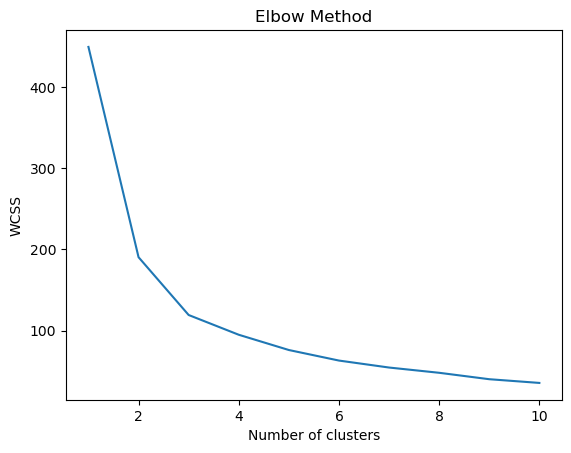

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming the dataframe is already loaded as df
features = ['sepal_length', 'sepal_width', 'petal_length']
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow method
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

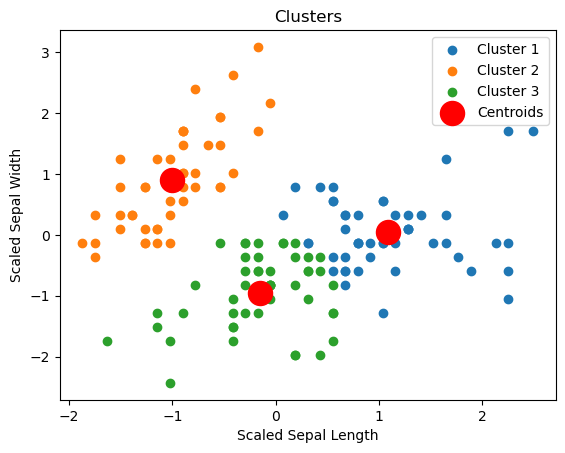

In [16]:
# Replace 'k_value' with the appropriate value from the elbow plot
k_value = 3

kmeans = KMeans(n_clusters=k_value, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X_scaled)

# Visualization
for i in range(k_value):
    plt.scatter(X_scaled[y_kmeans == i, 0], X_scaled[y_kmeans == i, 1], label=f'Cluster {i+1}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('Clusters')
plt.xlabel('Scaled Sepal Length')
plt.ylabel('Scaled Sepal Width')
plt.legend()
plt.show()

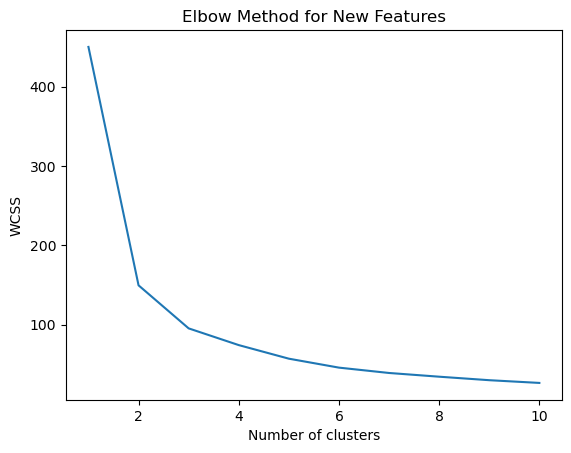

In [17]:
# New set of features
features_new = ['sepal_width', 'petal_length', 'petal_width']
X_new = df[features_new]

# Scaling the new features
X_new_scaled = scaler.fit_transform(X_new)

# Elbow method for the new set of features
wcss_new = []

for i in range(1, 11):
    kmeans_new = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans_new.fit(X_new_scaled)
    wcss_new.append(kmeans_new.inertia_)

plt.plot(range(1, 11), wcss_new)
plt.title('Elbow Method for New Features')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

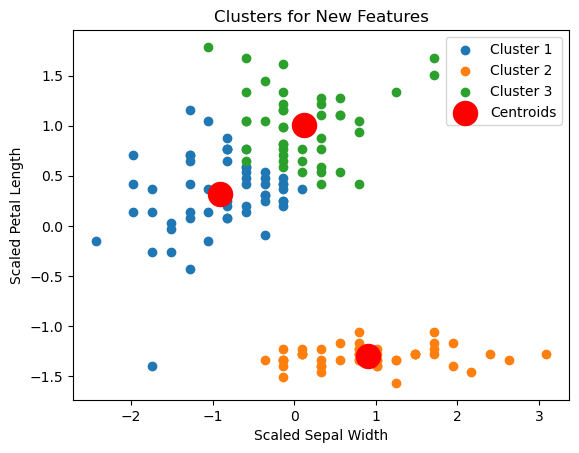

In [18]:
# Based on the elbow plot, choose an appropriate value for k
k_value_new = 3

kmeans_new = KMeans(n_clusters=k_value_new, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans_new = kmeans_new.fit_predict(X_new_scaled)

# Visualization for the new set of features
for i in range(k_value_new):
    plt.scatter(X_new_scaled[y_kmeans_new == i, 0], X_new_scaled[y_kmeans_new == i, 1], label=f'Cluster {i+1}')

plt.scatter(kmeans_new.cluster_centers_[:, 0], kmeans_new.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('Clusters for New Features')
plt.xlabel('Scaled Sepal Width')
plt.ylabel('Scaled Petal Length')
plt.legend()
plt.show()

In [19]:
def get_mall_data():
    # create the connection url
    url = f'mysql+pymysql://{username}:{password}@{host}/mall_customers'

    query = '''
    SELECT * 
    From customers'''

    df = pd.read_sql(query, url)

    return df

In [20]:
# Call the function to get the Zillow data
mall_df = get_mall_data()

# Write dataframe to CSV file
mall_df.to_csv("mall_data.csv", index=False)

In [21]:
def read_csv_file():
    df = pd.read_csv('mall_data.csv')
    return df

In [22]:
mall_df = read_csv_file()

In [23]:
mall_df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


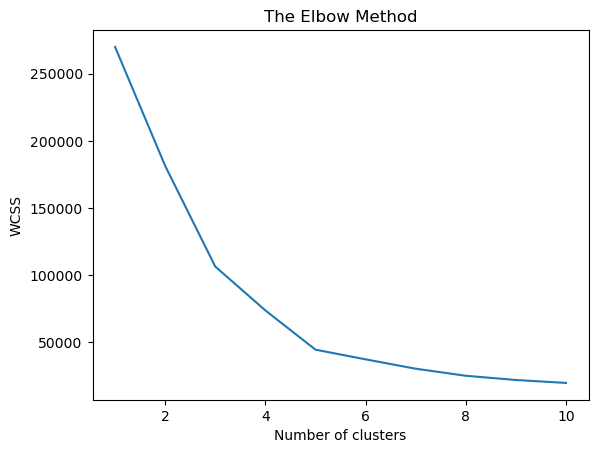

In [24]:
# Selecting features 'annual_income' and 'spending_score'
X = mall_df[['annual_income', 'spending_score']]

# Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

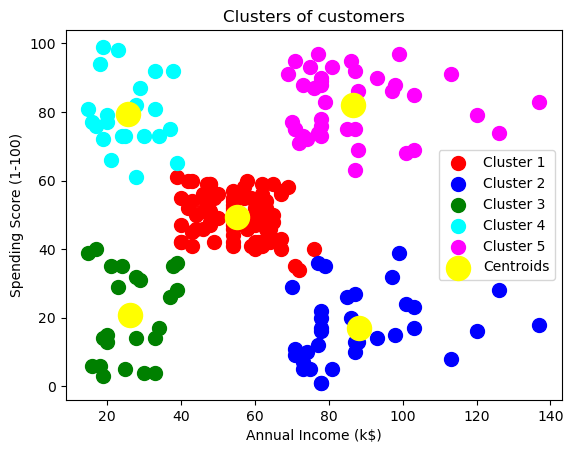

In [31]:
# Choose a good value for k based on the elbow plot
k = 5
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Visualizing the clusters
plt.scatter(X.values[y_kmeans == 0, 0], X.values[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X.values[y_kmeans == 1, 0], X.values[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X.values[y_kmeans == 2, 0], X.values[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X.values[y_kmeans == 3, 0], X.values[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X.values[y_kmeans == 4, 0], X.values[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

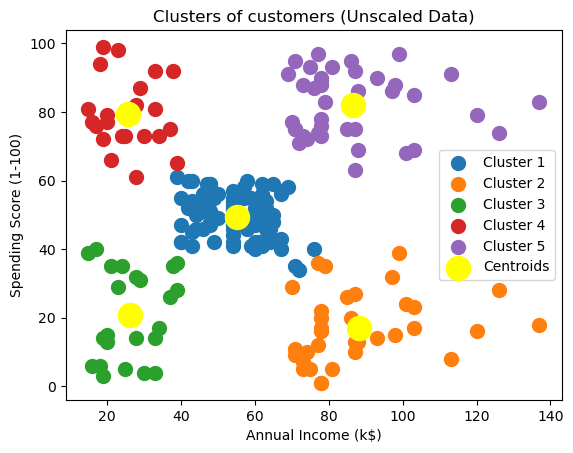

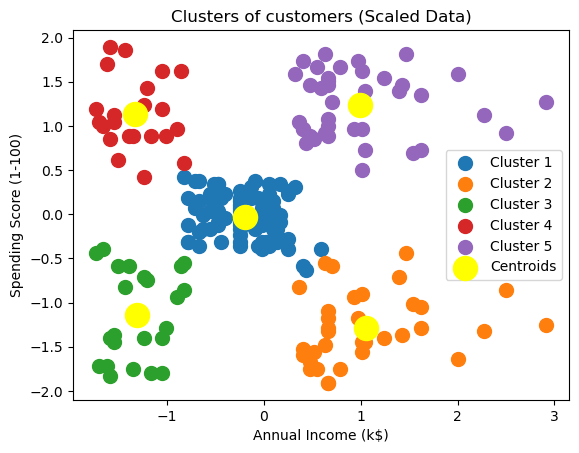

In [30]:
# Selecting features 'annual_income' and 'spending_score'
X = mall_df[['annual_income', 'spending_score']]

# Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose a good value for k based on the previous elbow plot, 
k = 5

# Perform K-means clustering on unscaled data
kmeans_unscaled = KMeans(n_clusters=k, init='k-means++', random_state=42)
y_kmeans_unscaled = kmeans_unscaled.fit_predict(X)

# Perform K-means clustering on scaled data
kmeans_scaled = KMeans(n_clusters=k, init='k-means++', random_state=42)
y_kmeans_scaled = kmeans_scaled.fit_predict(X_scaled)

# Function to visualize clusters
def visualize_clusters(X, y_kmeans, kmeans, title):
    plt.figure()
    for i in range(k):
        plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], s=100, label=f'Cluster {i+1}')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
    plt.title(title)
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.legend()
    plt.show()

# Visualize unscaled data clusters
visualize_clusters(X.values, y_kmeans_unscaled, kmeans_unscaled, 'Clusters of customers (Unscaled Data)')

# Visualize scaled data clusters
visualize_clusters(X_scaled, y_kmeans_scaled, kmeans_scaled, 'Clusters of customers (Scaled Data)')